# Mapeos en 1d

---

**NOTA** Los ejercicios de este capítulo consituyen la tarea 3. Estos ejercicios involucran que ustedes escriban código que debe ejecutarse correctamente para responder las preguntas que se formulan en los ejercicios. El código debe estar correctamente documentada o al menos comentado, y en general se deben definir funciones que realicen cosas concretas.

**Fecha límite de envío inicial del PR:** viernes 21 de septiembre

**Fecha límite de aceptación del PR:** martes 25 de septiembre

---

## Órbitas

Iniciaremos el estudio de sistemas dinámicos considerando *mapeos* en una dimensión. Los mapeos en una dimensión son simplemente aplicaciones de $F_\mu : \mathbb{R} \rightarrow \mathbb{R}$, de la forma

\begin{equation}
x_{n+1} = F_\mu (x_n).
\end{equation}

Aquí, $x_n$ representa el estado del sistema al "tiempo" $n$.

Por ahora, la única suposición importante para $F_\mu$ es que es una función que **no** involucra ningún tipo de variable estocástica o nada aleatorio. En este caso diremos que el sistema es determinista: el estado al "tiempo" $n+1$ sólo depende del estado al tiempo $n$, y de los parámetros $\mu$ del mapeo (que permanecen constantes respecto al tiempo).


*Iterar* la función $F_\mu(x)$ significa evaluarla una y otra vez, a partir de un valor inicial $x_0$ que llamaremos *condición inicial*. Esto lo escribiremos como $x_1=F_\mu(x_0)$ para el primer iterado, $x_2=F_\mu(x_1)=F^2_\mu(x_0)$ para el segundo, y en general, para el $n$-ésimo iterado escribiremos $x_n=F_\mu(x_{n-1})=F^n_\mu(x_0)$.

Por ejemplo, para $F(x)=x^2+1$, y omitiéndo el subíndice 0, tendremos

\begin{eqnarray}
F^2(x) & = & (x^2+1)^2+1,\\
F^3(x) & = & ((x^2+1)^2+1)^2+1,\\
F^4(x) & = & (((x^2+1)^2+1)^2+1)^2+1,
\end{eqnarray}

etc. Es claro, pues, que la notación $F^n(x)$ no significa la potencia $n$ del mapeo, si no el $n$-ésimo iterado.

Hablaremos de una órbita como la secuenc]ia de iterados, es decir, $x_0, x_1, x_2, \dots$. Así, para el ejemplo anterior con $x_0=0$ tendremos $x_1=1$, $x_2 = 2$, $x_3 = 5$, $x_4 = 26$, etc. Esta órbita, aparentemente tiende a infinito con $n\to\infty$.

Hay varios tipos de órbitas. Como veremos, unas órbitas particularmente importantes son los puntos fijos, los cuales satisfacen la ecuación
\begin{equation}
F_\mu(x) = x.
\end{equation}

Así, para $F(x)=x^2-x-4$, los puntos fijos satisfacen $x^2-2x-4=0$, cuyas soluciones son $1\pm\sqrt{5}$.

Numéricamente, y usando que conocemos los puntos fijos, tenemos:

In [1]:
f(x) = x^2-x-4

f(1+sqrt(5))-(1+sqrt(5)), f(1-sqrt(5))-(1-sqrt(5))

(0.0, 4.440892098500626e-16)

De aquí vemos que hay los posibles errores numéricos no permiten concluir que la segunda solución es punto fijo. Sin embargo, usando números de precisión extendida, vemos que con más bits de precisión, $f(x)-x$ se acerca más a cero.

In [2]:
?precision

search: precision setprecision



```
precision(num::AbstractFloat)
```

Get the precision of a floating point number, as defined by the effective number of bits in the mantissa.

---

```
precision(BigFloat)
```

Get the precision (in bits) currently used for [`BigFloat`](@ref) arithmetic.


In [3]:
precision(BigFloat)

256

In [4]:
f(1-sqrt(BigInt(5)))-(1-sqrt(BigInt(5)))

6.908934844075555700309081490240319656892800291549025108018962776134873442529942e-77

Otro tipo importante de órbitas son las órbitas periódicas. En este caso tenemos que una secuencia *finita* de iterados, se repite a partir de cierta iteración: $x_0, x_1, \dots, x_{n-1}, x_0, x_1, \dots$. El número menor de puntos de una órbita periódica tal que se hace aparente la periodicidad se llama *periodo*. Cada punto de dicha órbita es periódico con periodo $n$.

Vale la pena notar que los puntos fijos son trivialmente de periodo 1.

Un punto que pertenece a una órbita de periodo $n$ satisface la ecuación $F^n(x_0) = x_0$. Esto es, un punto de periodo $n$ del mapeo $F$, es un punto fijo (de periodo 1) del mapeo $F^n$.

Un punto $x_0$ se llama *eventualmente periódico* cuando, sin ser punto fijo o periódico, después de un cierto número finito de iteraciones, los iterados pertenecen a una órbita periódica. Un ejemplo, para el mapeo $F(x)=x^2-1$, es $x_0=1$: $F(1)=0$, $F^2(0)=-1$, $F^3(-1)=0$, etc.

En sistemas dinámicos típicos, la mayoría de los puntos no son fijos ni periódicos. Por ejemplo, el mapeo $T(x)=2x$ tiene como punto único punto fijo $x^*=0$. Cualquier otra órbita tiende a $\;\pm\infty$, ya que $T^n(x_0) = 2^n x_0$ y entonces $|T^n(x_0)|\to\infty$. 

En general, la situación es aún más compleja e interesante.

**Ejercicio 1:** 

Consideren el mapeo $F(x) = x^2-2$ definido en el intervalo $[-2,2]$. 

- ¿Qué podemos concluir después de muchos iterados para las condiciones iniciales $x_0=0$, $x_0=0.1$, $x_0=0.001$?
    
- ¿Qué propiedad hace que el interés en este mapeo sea el intervalo [-2,2]?


Para facilitar las cosas, conviene definir una función que simplifique el tomar los iterados de una función:

In [5]:
"""
    iteraciones(f::Function, número_iteraciones::Int, x0)

Genera un array unidimensional de tamaño `1 + número_iteraciones` que en la entrada ``i + 1`` tiene al elemento proveniente de iterar `x0` ``ì`` veces con la función `f`. En el caso de ```i = 1``, el valor en el array es igual a la condición inicial usada.

# Argumentos

Requiere:

+ `f`, una función,
+ `número_iteraciones`, un entero que dicta el número de iteraciones a realizar, y,
+ `x0`, el punto inicial.

En particular, la condición inicial suministrada `x0` es convertida a su respectivo flotante antes de calcular los iterados; esto para facilitar el uso de arrays: es necesario que la función que se itera admita valores flotantes o estructuras con valores flotantes.

# Ejemplo
```julia-repl

julia> iteraciones(x->x^2, 5, 2)
6-element Array{Int64,1}:
          2
          4
         16
        256
      65536
 4294967296

julia> v = x -> [x[1] - x[2], x[1]*x[2]]; iteraciones(v, 2, [1, 3])
3-element Array{Array{Float64,1},1}:
 [1.0, 3.0]  
 [-2.0, 3.0] 
 [-5.0, -6.0]
```
"""
function iteraciones(f::Function, número_iteraciones::Int, x0)
    
    valor = float.(x0)
    
    iterados = [valor]
    
    for i in 1:número_iteraciones
        
        valor = f(valor)
        push!(iterados, valor)
    end
    
    return(iterados)
end

iteraciones

Así como eventualmente el valor de la iteración correspondiente:

In [6]:
"""
    iterar(f::Function, número_iteraciones::Int, x0)

Devuelve el resultado de iterar `número_iteraciones` veces la función `f` con condición inicial `x0`.

# Argumentos

Requiere:

+ `f`, una función,
+ `número_iteraciones`, un entero que dicta el número de iteraciones a realizar, y,
+ `x0`, el punto inicial.

En particular, la condición inicial suministrada `x0` es convertida a su respectivo flotante antes de calcular los iterados; esto para facilitar el uso de arrays: es necesario que la función que se itera admita valores flotantes o estructuras con valores flotantes.

# Ejemplo
```julia-repl

julia> iterar(x->x^2, 5, 2)
4294967296

julia> v = x -> [x[1] - x[2], x[1]*x[2]]; iterar(v, 2, [1, 3])
2-element Array{Float64,1}:
 -5.0
 -6.0
```
"""
function iterar(f::Function, número_iteraciones::Int, x0)
    
    iterados = iteraciones(f, número_iteraciones, x0)
    valor = last(iterados)
    
    return(valor)
end

iterar

Para la función $ F(x) = x^2 - 2 $, consideremos el resultado de usar las condiciones iniciales dadas iterando $F$ 1000 veces:

In [7]:
F(x) = x^2 - 2

x0 = 0
número_iteraciones = 1000

iteraciones_F_1 = iteraciones(F, número_iteraciones, x0)

1001-element Array{Float64,1}:
  0.0
 -2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  ⋮  
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0

Entonces, $x_0 = 0$ es un punto eventualmente periódico, más aún, la órbita a la que converge es de periodo uno, lo que indica que la iteración converge eventualmente a un punto fijo: $x = 2$.

In [8]:
x0 = 0.1
iteraciones_F_2 = iteraciones(F, número_iteraciones, x0)

1001-element Array{Float64,1}:
  0.1                
 -1.99               
  1.9601000000000002 
  1.8419920100000007 
  1.3929345649038427 
 -0.05973329789614246
 -1.9964319331224507 
  1.9857404635910454 
  1.9431651887427797 
  1.7758909507417626 
  1.1537886689264814 
 -0.6687717074568584 
 -1.5527444033052382 
  ⋮                  
 -0.3682674012305529 
 -1.8643791211908949 
  1.4759095075325335 
  0.17830887442492527
 -1.9682059453013163 
  1.8738346431194484 
  1.5112562697545906 
  0.28389551287255976
 -1.9194033377708262 
  1.6841091730457882 
  0.8362237067369684 
 -1.3007299122910845 

No se observa ningún tipo de patrón evidente, aunque una mejor forma de investigar esto es realizando una gráfica:

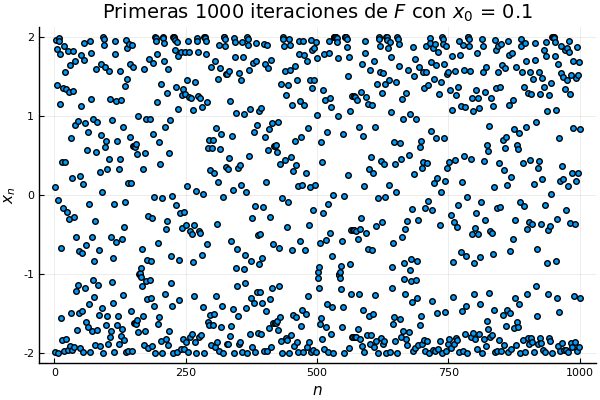

In [9]:
using Plots
using LaTeXStrings
pyplot()

scatter(iteraciones_F_2, key = false, xlabel = L"n", ylabel = L"x_n", title = LaTeXString("Primeras 1000 iteraciones de \$F\$ con \$x_0\$ = $x0"))

No se observa periodicidad, aunque se nota que todos los valores resultantes están en el intervalo [-2, 2].

In [10]:
x0 = 0.001
iteraciones_F_3 = iteraciones(F, número_iteraciones, x0)

1001-element Array{Float64,1}:
  0.001              
 -1.999999           
  1.9999960000010004 
  1.9999840000200018 
  1.9999360003360063 
  1.999744005439982  
  1.9989760872931428 
  1.9959053975698025 
  1.9836383560482713 
  1.9348211275858884 
  1.7435327957527287 
  1.0399066098653265 
 -0.9185942427584037 
  ⋮                  
  1.996506616727705  
  1.986038670637507  
  1.944349601267596  
  1.7804953719494598 
  1.1701637695334455 
 -0.6307167524712776 
 -1.6021963781520852 
  0.5670332341636595 
 -1.6784733113539005 
  0.8172726569273281 
 -1.332065404238946  
 -0.22560175882973366

No se observa ningún tipo de patrón evidente, aunque una mejor forma de investigar esto es realizando una gráfica:

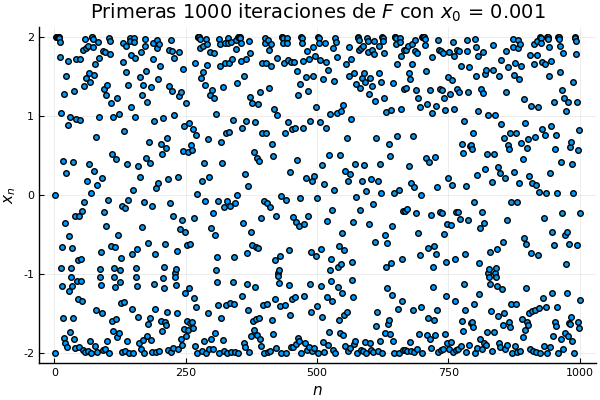

In [11]:
scatter(iteraciones_F_3, key = false, xlabel = L"n", ylabel = L"x_n", title = LaTeXString("Primeras 1000 iteraciones de \$F\$ con \$x_0\$ = $x0"))

No se observa periodicidad, aunque se nota que todos los valores resultantes están en el intervalo [-2, 2].

Como se pudo observar en los ejemplos, existió un punto que fue eventualmente periódico y otros dos que aparentemente no tienen ningún patrón que sea evidente. Sin embargo, en todos los casos el valor de las iteraciones permanece dentro del intervalo [-2, 2], esto es por lo siguiente:

Sea $ x \in [-2, 2]$, entonces, $x^2 \in [0, 4] \implies F(x) = x^2 -2 \in [-2, 2] $. 

Esto quiere decir que todas las condiciones iniciales tomadas en el intervalo [-2, 2] son mapeadas al mismo intervalo con la función $F$. Esto, considerando los ejemplos anteriores, nos indica que hay mapeos que no son periódicos o eventualmente periódicos pero acotados.

## Análisis gráfico

A continuación ilustraremos una manera gráfica de visualizar la dinámica en un mapeo de un grado de libertad. Para esto hay que instalar alguna (o varias) paqueterías gráficas. En lo que sigue yo utilizaré el paquete `Plots.jl`; la documentación oficial se encuentra [aquí](https://juliaplots.github.io), y hay un [video](https://www.youtube.com/watch?v=LGB8GvAL4HA) donde se explican detalles del funcionamiento. Yo utilizaré aquí como *backend* [`GR.jl`](https://github.com/jheinen/GR.jl), aunque hay varios más que ustedes pueden libremente elegir.

Antes que nada, deben instalar la paquetería. Dado que `Plots.jl` es un paquete *registrado*, uno lo puede instalar simplemente con:

```julia
    Pkg.add("Plots")
```

También instalaremos otras dos paqueterías útiles:
```julia
    Pkg.add("PlotRecipes")  # Instala una paquetería auxiliar muy útil
    Pkg.add("GR")           # Instala PyPlot, que usaré como *backend*
```

Otros *backends* interesantes son `PyPlot` y `Plotly`.

Una vez instaladas las paqueterías, para usarlas la debemos cargarlas con el comando:

In [12]:
using Plots

In [13]:
#using PlotRecipes
#Marca un error al ejecutar.

In [14]:
# Esto define a `GR.jl` como el *backend* que usaremos
# Puede tardar un poco en cargarse, especialmente la primer vez que se usa.
#gr()
pyplot()

Plots.PyPlotBackend()

Otros *backends* pueden usarse llamando el nombre del *backend* concreto. Por ejemplo:

```julia
pyplot()       # carga GR
plotly()       # carga Plotly
```
    
Las paqueterías relacionadas con lo\s backends tienen que estar instalados.

Cargamos el paquete `LaTeXStrings.jl`. Sirve para poner cadenas de caractéres, en LaTex, para los ejes o los títulos.

In [15]:
using LaTeXStrings

La idea del análisis gráfico es poder visualizar los iterados de una órbita. En el eje de las abscisas dibujaremos $x_n$ y en el de las ordenadas dibujaremos $F(x_n)$. Entonces, para localizar $x_{n+1}$ simplemente necesitamos la gráfica de $y=F(x)$.

Como ejemplo usaremos $F(x) = \sqrt{x}$.

In [16]:
x0 = 5.0*rand()
x1 = sqrt(x0)

rangox = 0.0:1/32:5.2

x0

1.9872554657008523

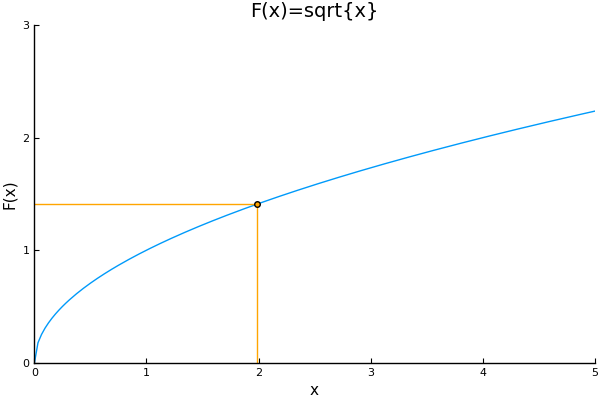

In [17]:
# Plots.jl se tarda en el primer dibujo dado que inicializa
# varias cosas internamente

# Dibuja F(x) y define escalas, etc
plot(rangox, sqrt, 
    xaxis=("x", (0.0, 5.0), 0:5.0), 
    yaxis=((0.0, 3.0), "F(x)"), 
    legend=false, title="F(x)=sqrt{x}", grid=false)

# Dibuja x_0 -> x_1 = F(x_0)
plot!([x0, x0, -0.5], [-0.5, x1, x1], color=(:orange), marker=:circle)


Para visualizar el valor $x_1$ en el eje `x`, usamos la identidad, i.e., la recta $y=x$. Noten el ligero cambio para que los ejes y el título aparezcan más agradables.

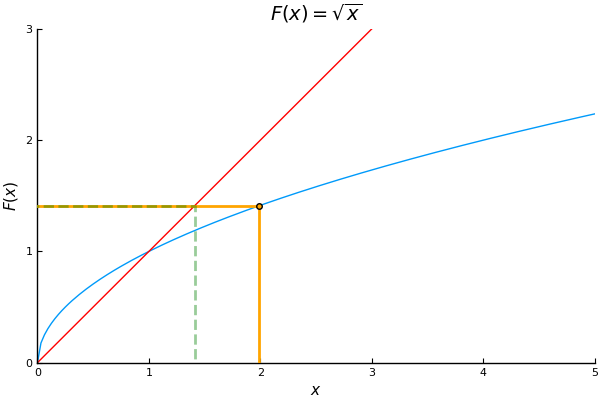

In [18]:
# Dibuja F(x) y define escalas, etc
plot(rangox, sqrt, 
    xaxis=(L"x", (0.0, 5.0), 0:5.0), 
    yaxis=((0.0, 3.0), L"F(x)"), 
    legend=false, title=L"F(x)=\sqrt{x}", grid=false)
plot!(rangox, x->x, color=:red)

# Dibuja x_0 -> x_1 = F(x_0)
plot!([x0, x0, -0.5], [-0.5, x1, x1], color=:orange, lw=2.0, marker=:circle)
# Dibuja x_1 -> Id(x_1) = x_1
plot!([-0.5, x1, x1], [x1, x1, -0.5], line=(:green, :dash, 2.0, 0.4))


Dado que tenemos $x_1$ en el eje $x$, el mismo proceso de antes puede ser implementado para obtener $x_2$, o cualquier otro iterado $x_n$. Sin embargo, vale la pena notar que, una vez que estamos en la diagonal, podemos ir a la función para obtener $x_2$, y nuevamente a la diagonal y a la función para tener $x_3$, etc.

In [19]:
x2 = sqrt(x1)

1.187308084677652

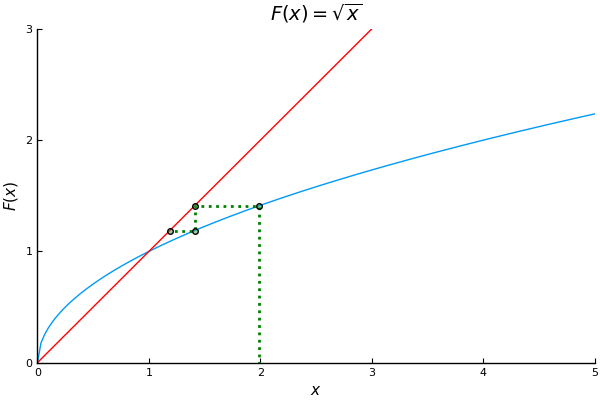

In [20]:
# Dibuja F(x) y define escalas, etc
plot(rangox, sqrt, 
    xaxis=(L"x", (0.0, 5.0), 0:5.0), 
    yaxis=((0.0, 3.0), L"F(x)"), 
    legend=false, title=L"F(x)=\sqrt{x}", grid=false)
plot!(rangox, x->x, color=:red) 

plot!([x0, x0, x1, x1, x2], [-0.5, x1, x1, x2, x2], 
line=(:green, :path, 2.0, :dot), marker=(:circle, 0.5))


**Ejercicio 2:** 

Escriban una función cuyos argumentos son la función `F` del mapeo, `x0`, la condición inicial, y `n` el número de iterados del mapeo (un número entero), que genere los `n` iterados del mapeo y haga el análisis gráfico descrito del mapeo. Ilustren el funcionamiento con $F(x)=\sqrt{x}$. ¿Qué pueden concluir de iterar *muchas* veces una condición inicial?

Una forma sencilla de implementar lo solicitado es generalizando el código anterior:

In [21]:
"""
    análisis_gráfico(f::Function, número_iteraciones::Int, x0::Real, a::Real, b::Real, paso::Real, c::Real, d::Real; title::String = "", ylabel::String = "\$f(x)\$", color = :green)

Genera un análisis gráfico de los iterados de la función `f` por el `número_iteraciones` dado con condición inicial `x0`. La ventana de graficación usada está dada por `` [a, b]\\times[c, d] ``. Para graficar la función, se usan puntos de muestreo separados por `paso` en el intervalo `` [a,b] ``. El título, el título del eje y y el color de las líneas para los iterados se pueden cambiar usando los mismos argumentos que en `Plots.jl`.

# Argumentos

Requiere:

+ `f`, una función,
+ `número_iteraciones`, un entero que dicta el número de iteraciones a realizar,
+ `x0`, el punto inicial usado, y,
+ `a`, `b`, `c` y `d`, los parámetros usados para establecer la ventana de visualización,

En particular, la condición inicial suministrada `x0` es convertida a 
su respectivo flotante antes de calcular los iterados; esto para facilitar el uso de arrays: es necesario que la función que se itera admita valores flotantes o estructuras con valores flotantes.

Opcionalmente se pueden especificar:

+ `title`, el título de la gráfica mediante un string,
+ `ylabel`, el título del eje y mediante un string, y,
+ `color` el color de las líneas usadas para los iterados.

En particular, `title` y `ylabel` son interpretados como strings con ecuaciones escritas en  `` \\LaTeX `` mediante el comando `LaTeXString`. Esto quiere decir que el texto no es interpretado dentro del entorno matemático de  `` \\LaTeX `` sin incluirlo entre pares de  `` \\ \$ `` (signos de dinero escapados).

# Ejemplo

Para visualizar los primeros cinco iterados de la función `` x \\mapsto \\sqrt{x} `` en la ventana `` [0, 1] \\times [0,1] `` con la función graficada con una resolución de paso igual a 0.01 con condición inicial 0.5 se puede usar el comando:
```julia-repl

julia> análisis_gráfico(x->sqrt(x), 5, 0.5, 0, 1, 0.01, 0, 1)
```

Para hacer lo mismo, pero cambiando el título a "Ejemplo", el título del eje y a "Eje y" y el color de las lineas para los iterados a rojo se puede usar:
```julia-repl

julia> análisis_gráfico(x->sqrt(x), 5, 0.5, 0, 1, 0.01, 0, 1, title = "Ejemplo", ylabel = "Eje y", color = :black)
```
"""
function análisis_gráfico(f::Function, número_iteraciones::Int, x0::Real, a::Real, b::Real, paso::Real, c::Real, d::Real; title::String = "", ylabel::String = "\$f(x)\$", color = :green)

    #Convirtiendo los elementos de los puntos muestra a flotantes:
    a = float(a)
    b = float(b)
    paso = float(paso)

    #Cargando los iterados:
    iterados = iteraciones(f, número_iteraciones, x0)

    #Generando la gráfica de la función:
    rango_x = a:paso:b
    
    título = LaTeXString(title)
    leyenda_y = LaTeXString(ylabel)
    
    gráfica = plot(rango_x, f, 
        xaxis = (L"x", (a, b)),
        yaxis = (leyenda_y, (c, d)),
        legend = false, 
        title = título, 
        grid = false)
    
    #Y de la identidad:
    
    plot!(gráfica, x -> x, color = :red)

    #Gráfica de los iterados iniciales:
    x_0 = iterados[1]
    x_1 = iterados[2]

    x_iniciales = [x_0, x_0, x_1]
    y_iniciales = [0, x_1, x_1]

    plot!(gráfica, x_iniciales, y_iniciales, 
        line=(color, :path, 2.0, :dot), 
        marker=(:circle, 0.5))

    #Gráfica del resto de los iterados:
    for i in 2:número_iteraciones

        x_actual = iterados[i]
        x_siguiente =  iterados[i+1]
        
        x = [x_actual, x_actual, x_siguiente]
        y = [x_actual, x_siguiente, x_siguiente]

        plot!(gráfica, x, y, 
            line=(color, :path, 2.0, :dot), 
            marker=(:circle, 0.5))
    end
    
    return(gráfica)
end

análisis_gráfico

Para realizar el análisis de la función $F(x) = \sqrt{x}$ en varias condiciones iniciales se puede utilizar el macro `@manipulate` de la paquetería `Interact.jl`:

In [22]:
using Interact

HTML{String}("    <script class='js-collapse-script'>\n        var curMatch =\n            window.location.href\n            .match(/(.*?)\\/notebooks\\/.*\\.ipynb/);\n\n        curMatch = curMatch ||\n            window.location.href\n            .match(/(.*?)\\/apps\\/.*\\.ipynb/);\n\n        if ( curMatch ) {\n            \$('head').append('<base href=\"' + curMatch[1] + '/\">');\n        }\n    </script>\n")

HTML{String}("<script class='js-collapse-script' src='/assetserver/5e3f21313972c959841d02dd5dd703dce3bd1f4a-assets/webio/dist/bundle.js'></script>")

HTML{String}("<script class='js-collapse-script' src='/assetserver/5e3f21313972c959841d02dd5dd703dce3bd1f4a-assets/providers/ijulia_setup.js'></script>")

HTML{String}("  <script class='js-collapse-script'>\n    \$('.js-collapse-script').parent('.output_subarea').css('padding', '0');\n  </script>\n")

Widget{:manipulate,Any}(OrderedDict{Symbol,Any}(:x0=>Widget{:slider,Float64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64}("ob_05", 0, Any[SyncCallback(Scope("knockout-component-89521c06-931b-4239-8d4a-784ad3186135", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["x0"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"text-align:right;width:18%")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>41,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"flex-grow:1; margin: 0 2%")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"width:18%")), 1)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"display:flex; justify-content:center; align-items:center;")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("formatted_vals"=>(Observable{Any}("ob_03", ["0.0", "0.1", "0.2", "0.3", "0.4", "0.5", "0.6", "0.7", "0.8", "0.9"  …  "3.1", "3.2", "3.3", "3.4", "3.5", "3.6", "3.7", "3.8", "3.9", "4.0"], Any[SyncCallback(Scope(#= circular reference @-6 =#), SyncCallback(Scope(#= circular reference @-7 =#), ##40#42{Scope,String}(Scope(#= circular reference @-8 =#), "formatted_vals")))]), nothing),"changes"=>(Observable{Int64}(#= circular reference @-6 =#), nothing),"formatted_value"=>(Observable{String}("ob_04", "2.0", Any[SyncCallback(Scope(#= circular reference @-6 =#), SyncCallback(Scope(#= circular reference @-7 =#), ##40#42{Scope,String}(Scope(#= circular reference @-8 =#), "formatted_value")))]), nothing),"index"=>(Observable{Any}("ob_02", 21, Any[##25#28{##70#73,Observable{Float64},Array{Function,1}}(##70#73(Box(0.0:0.1:4.0)), Observable{Float64}("ob_01", 2.0, Any[##24#27{##68#71,Observable{Any},Array{Function,1}}(##68#71(Box(0.0:0.1:4.0)), Observable{Any}(#= circular reference @-6 =#), Function[##24#27{##68#71,Observable{Any},Array{Function,1}}(#= circular reference @-2 =#), ##25#28{##70#73,Observable{Float64},Array{Function,1}}(#= circular reference @-5 =#)]), #g#15{##16#17{##10#12,Observable{Any}},Tuple{Observable{Float64}}}(##16#17{##10#12,Observable{Any}}(##10#12(), Observable{Any}("ob_06", Plot{Plots.PyPlotBackend() n=7}, Any[])), (Observable{Float64}(#= circular reference @-4 =#),))]), Function[##24#27{##68#71,Observable{Any},Array{Function,1}}(##68#71(Box(0.0:0.1:4.0)), Observable{Any}(#= circular reference @-5 =#), Function[#= circular reference @-2 =#]), ##25#28{##70#73,Observable{Float64},Array{Function,1}}(#= circular reference @-2 =#)]), SyncCallback(Scope(#= circular reference @-6 =#), SyncCallback(Scope(#= circular reference @-7 =#), ##40#42{Scope,String}(Scope(#= circular reference @-8 =#), "index")))]), nothing)), Set(String[]), nothing, Any["knockout"=>"/home/gabriel/.julia/packages/Knockout/JIqpG/src/../assets/knockout.js", "knockout_punches"=>"/home/gabriel/.julia/packages/Knockout/JIqpG/src/../assets/knockout_punches.js", "/home/gabriel/.julia/packages/InteractBase/Q4IkI/src/../assets/all.js", "/home/gabriel/.julia/packages/InteractBase/Q4IkI/src/../assets/style.css", "/home/gabriel/.julia/packages/InteractBulma/Ohu5Y/src/../assets/main.css"], Dict{Any,Any}("formatted_vals"=>Any[JSString("(function (val){return (val!=this.model[\"formatted_vals\"]()) ? (this.valueFromJulia[\"formatted_vals\"]=true, this.model[\"formatted_vals\"](val)) : undefined})")],"_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHand
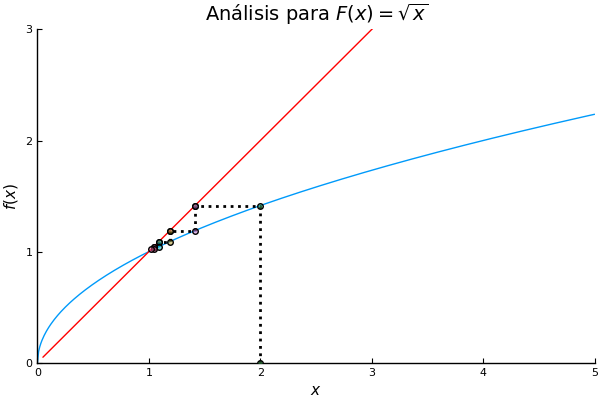
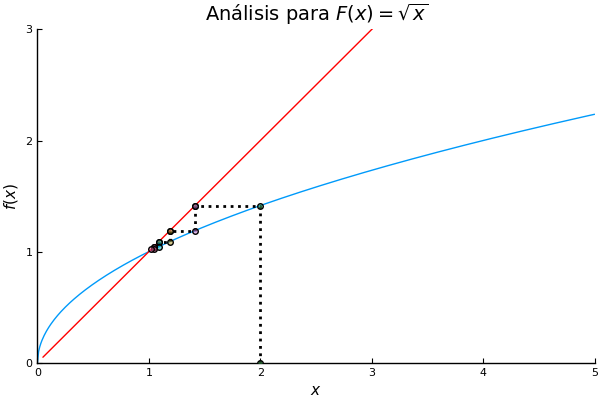

In [23]:
F(x) = sqrt(x)
número_iteraciones = 5
a = 0; b = 5; paso = 0.01; c = 0; d = 3;
título = "Análisis para \$ F(x) = \\sqrt{x} \$"

@manipulate for x0 in 0:0.1:4

    análisis_gráfico(F, número_iteraciones, x0, a, b, paso, c, d, title = título, color = :black)
end


Como se puede observar, se tienen dos puntos fijos: uno en $x_0 = \sqrt{x_0} = 0$ y otro en $x_1 = \sqrt{x_1} = 1$. Más aún, para el muestreo de puntos usado distintos de $x_0$, se observa que $x_1$ tiende a "atraer" las trayectorias de otros puntos. Esto se observa gráficamente debido a que las trayectorias generadas se acercan a este punto y el cambio generado por la iteración de la función es menor en la región en torno a $x_1$ en comparación a regiones "lejanas" a este punto. Esto se puede observar analíticamente observando que: $0 < x < 1 \implies 0 < x < \sqrt{x} < 1 $ y $1 < x \implies  1 < \sqrt{x} < x < 1$.

Obviamente, los puntos fijos de un mapeo pueden ser obtenidos del análisis gráfico descrito: sólo basta encontrar las intersecciones de la recta identidad con la función del mapeo.

Vale la pena enfatizar que, si bien el análisis gráfico es útil, no sirve para *demostrar* propiedades sobre la dinámica del mapeo, aunque sirve para entender detalles de ésta.

**Ejercicio 3:** 

- Usen el análisis gráfico para encontrar los puntos de periodo dos del mapeo $F(x) = x^2 -1.1$. Den explícitamente los puntos fijos.
    
- Usen el método de Newton, usando iterados iniciales  sagazmente seleccionados, para obtener los puntos fijos.

**Ejercicio 4:**

Hagan un análisis completo de las posibles órbitas de los siguientes mapeos, usando distintos colores para distintas órbitas. Interesa entre otras cosas saber cuántos puntos fijos tiene y cómo es la dinámica cerca de dichos puntos.

1. $F_1(x) = \frac{1}{3x}$.

2. $F_2(x) = -\frac{x^5}{5}$.

3. $F_3(x) = \frac{x}{2}-2$.

**Ejercicio 5:**

- Para el mapeo mapeo $F(x) = x^2-2$ en el intervalo $[-2,2]$ (ejercicio 1), consideren un punto al azar en el intervalo $[-2,2]$ y construyan una órbita muy larga, por ejemplo, de $20\,000$ iterados. Obtengan el histograma de frecuencia (normalizado) de visita de los puntos de la órbita. ¿Qué conclusión podemos sacar de este histograma?

- \Repitan el inciso anterior para el mapeo: $G(x) = 2x \mod 1$ en el intervalo [0,1].

(NOTA: En cuanto al histograma, pueden construir su propia función que haga el histograma, o buscar en las entrañas de la documentación.)

# Puntos fijos

Como dijimos antes, el análisis gráfico es útil pero no necesariamente riguroso. 

Un resultado riguroso (¡teorema!) que es útil para encontrar puntos fijos es el **teorema del valor intermedio**:

Supongamos que $F:[a,b]\to\mathbb{R}$ es *continua*, y que $y_0$ se encuentra entre $F(a)$ y $F(b)$. Entonces, existe un punto en $x_0\in[a,b]$ tal que $F(x_0)=y_0$.



Una consecuencia de este teorema es el teorema del punto fijo.

**Teorema del punto fijo**

Supongamos que $F:[a,b]\to[a,b]$ es *continua*. Entonces, existe un punto para $F$ en $[a,b]$. 

Algunos comentarios:

- El teorema asienta la existencia de un punto fijo; puede haber más.

- El teorema asume que $F$ es *continua* y que mapea al interval $[a,b]$ en si mismo.

- El intervalo $[a,b]$ es *cerrado*.

- El teorema **no** dice cómo encontrar a los puntos fijos.

La prueba se basa en aplicar el teorema del punto intermedio para la función $H(x)=F(x)-x$, y mostrar que existe un valor $x_0$ tal que $H(x_0)=0$. $H(x)$ es continua en el intervalo $[a,b]$ (así que se satisfacen las hipótesis del teorema del punto intermedio) y satisface $H(a) = F(a)-a \ge 0$ y $H(b)=F(b)-b\le 0$. (Estas propiedades se satisfacen ya que $F:[a,b]\to[a,b]$.) $\Box$

Como vimos en los ejercicios, algunos puntos fijos a veces *atraen* puntos cercanos, a veces los *repelen*, y otras veces hay cierta atracción o repulsión.

A fin de entender las cosas con mayor detalle, consideremos el siguiente mapeo *lineal*:

\begin{equation}
F_\alpha(x) = \alpha x,
\end{equation}

con $0<\alpha <1$.

*Obviamente*, $x^*=0$ es un punto fijo del mapeo.

In [ ]:
# Definición del mapeo
f(x, α) = α * x

Veamos cuál es la dinámica cerca del origen:

In [ ]:
"""
    iteramapeo(f, x0, n)

Esta función itera el mapeo `f`, usando como condición inicial `x0`, `n::Int` veces
y regresa dos vectores que continen la secuencia de puntos, incluyendo las
*visitas* a la diagonal.
"""
function iteramapeo(f, x0, n::Int)
    xx = [x0]
    fx = [0.0]
    for it = 1:n
        x1 = f(x0)
        push!(xx, x0)
        push!(fx, x1)
        x0 = x1
        push!(xx, x1)
        push!(fx, x1)
    end
    xx, fx
end

In [ ]:
const α = 0.6
fα = x -> f(x, α)

In [ ]:
x1α, fx1α = iteramapeo(fα, 0.8, 20); 
x2α, fx2α = iteramapeo(fα, -0.8, 20); 

In [ ]:
plot(-1:1/32:1, fα, label=L"F_\alpha(x)",
    xaxis=(L"x", (-1.0, 1.0)), yaxis=L"F_\alpha(x)")
plot!(-1:1/32:1, identity, label=L"Id")
plot!(x1α, fx1α, marker=(:dot, 3, 0.4), label=L"x1\alpha")
plot!(x2α, fx2α, marker=(:dot, 3, 0.4), label=L"x2\alpha")


Como puede observarse en la figura, los puntos *convergen*, o son atraídos al punto fijo $x^*=0$.

In [ ]:
fx1α[end], fx2α[end]

Consideremos ahora el caso $\alpha>1$.

In [ ]:
const β = 2.2
fβ = x -> f(x, β)

In [ ]:
x1β, fx1β = iteramapeo(fβ, 0.08, 8); 
x2β, fx2β = iteramapeo(fβ, -0.08, 8); 

In [ ]:
plot(-1:1/32:1, fβ, grid=:false, xaxis=(L"x", (-1.0, 1.0)), yaxis=(L"F_\beta(x)", (-1.0, 1.0)))
plot!(-1:1/32:1, identity)
plot!(x1β, fx1β, marker=(:dot, 3, 0.4))
plot!(x2β, fx2β, marker=(:dot, 3, 0.4))


In [ ]:
fx1β[end], fx2β[end]

Claramente, los iterados de un punto cercano al punto fijo $x^*=0$ se alejan de él. Uno dice que el punto fijo los *repele*.

De igual manera podemos hacer el análisis para casos en que el parámetro sea negativo.

In [ ]:
const γ = -0.6
fγ = x -> f(x, γ)

const δ = -1.2
fδ = x -> f(x, δ)

In [ ]:
x1γ, fx1γ = iteramapeo(fγ, 0.8, 14); 
x1δ, fx1δ = iteramapeo(fδ, 0.08, 14);

In [ ]:
plot(-1:1/32:1, fγ, xaxis=(L"x", (-1.0, 1.0)), yaxis=(L"F_\gamma(x)", (-1.0, 1.0)))
plot!([-1:1/32:1 -1:1/32:1], [-1:1/32:1 -1:1/32:1], layout=2)
plot!(x1γ, fx1γ, marker=(:dot, 3, 0.4))

In [ ]:
plot(-1:1/32:1, fδ, xaxis=(L"x", (-1.0, 1.0)), yaxis=(L"F_\delta(x)", (-1.0, 1.0)))
plot!([-1:1/32:1 -1:1/32:1], [-1:1/32:1 -1:1/32:1], layout=2)
plot!(x1δ, fx1δ, marker=(:dot, 3, 0.4))

Claramente, la *magnitud* de la derivada en el punto fijo $|F'(x^*)|$ da información sobre el comportamiento local cerca del punto fijo. Así, *definimos* a un **punto fijo atractor** cuando $|F'(x^*)|<1$, y a un **punto fijo repulsor** cuando $|F'(x^*)|>1$. Dependiendo del signo uno puede decir que la convergencia (o divergencia) es *uniforme* (por el mismo lado)
si la derivada es positiva, o *alternante* (por ambos lados) si el signo es negativo.

Esto, en algún sentido aún ambiguo, es lo que significa que un punto fijo sea *estable* o *inestable*.

**Ejercicio 6:**

Analicen los mapeos

- F(x) = x^2,

- F(x) = x^3,

- F(x) = -x^3,

que se satisface $F(0) = F'(0) = 0$.

Para entender el comportamiento descrito anteriormente, usamos el **teorema del valor medio**:

Supongamos que $F$ es una función diferenciable en $[a,b]$. Entonces existe un valor $c\in[a,b]$ tal que la siguiente igualdad se cumple:

\begin{equation}
F'(c) = \frac{F(b)-F(a)}{b-a}.
\end{equation}


Con este resultado demostraremos:

**Teorema del punto fijo atractivo**

Supongamos que $x_0$ es un punto fijo atractivo de $F$, que es diferenciable. Entonces, existe un intervalo $I$ que contiene a $x_0$ en su interior, y que satisface que si $x\in I$ entonces $F^n(x)\in I$ *para toda* $n$, y además $F^n(x)\to x_0$ al $n\to\infty$.

La demostración es más o menos la siguiente: Dado que $x_0$ es un punto fijo atractivo, entonces $|F'(x_0)|<1$. Entonces, existe un $\lambda>0$ tal que $|F'(x_0)|<\lambda<1$. Entonces, existe un valor $\delta>0$ tal que para $x$ suficientemente cerca de $x_0$ su derivada está acotada aún por $\lambda$. Esto es, para $x\in[x_0-\delta,x_0+\delta]$ tenemos que se cumple $|F'(x)|<\lambda$. Por el teorema del valor medio, para un punto $p$ en este intervalo tenemos

\begin{equation}
\Big|\frac{F(p)-F(x_0)}{p-x_0}\Big| < \lambda,
\end{equation}

de donde, usando que $x_0$ es punto fijo, obtenemos:

\begin{equation}
|F(p)-x_0| < \lambda |p-x_0|.
\end{equation}

Es decir, la distancia de $F(p)$ a $x_0$ es menor que la distancia de $p$ a $x_0$. En otras palabras, $F(p)$ está más cerca de $x_0$. 

Repitiendo el argumento para $F^2(p)$, tenemos $|F^2(p)-x_0|<\lambda^2|p-x_0|$. De aquí que, cuando $n\to\infty$ se tenga $F^n(p)\to x_0$.$\Box$


Vale la pena notar que, de hecho, el teorema muestra que para condiciones iniciales suficientemente cerca del punto fijo, la convergencia es *exponencial*.

Con las mismas ideas se puede demostrar el **Teorema del punto fijo repulsivo**:

Supongamos que $x_0$ es un punto fijo repulsivo de $F$, que es diferenciable. Entonces, existe un intervalo $I$ que contiene a $x_0$ en su interior, y que satisface que si $x\in I$ y $x\neq x_0$ entonces existe un entero $n>0$ tal que $F^n(x)\notin I$.

Los teoremas anteriores muestran que, *numéricamente*, los puntos fijos atractivos son sencillos de localizar, mientras que los repulsivos son, en algún sentido, invisibles numéricamente. Para el caso atractivo, si alguno de los iterados de una condición inicial aleatoria *entra* en $I$, tendremos convergencia al punto fijo, mientras que en el caso repulsivo debemos tener un iterado que se mapee *exactamente* en el punto fijo para caer en él. Y esto, en general, nunca ocurre.

**Ejercicio 7:**

Analicen los mapeos

- F(x) = x,

- F(x) = -x,

- F(x) = x-x^2,

que se satisface $F(0) = 0$ y $|F'(0)| = 1$. (Este tipo de puntos son *neutralmente* atractivos o repulsivos.) ¿Qué podemos decir de la convergencia?

## Puntos periódicos

De la misma manera que para los puntos fijos, los puntos periódicos se pueden clasificar en atractivos, repulsivos o neutros. Básicamente, esto es consecuencia de que cada punto periódico, de periodo $p$, del mapeo $x_{n+1}=F(x_n)$, es un punto fijo del mapeo $x_{n+1} = F^p(x_n)$.

Un ejemplo sencillo de esto es el mapeo $F(x)=x^2-1$ en el intervalo $[-1,1]$. Claramente, este mapeo tiene tiene una 
órbita de periodo 2 dada por $0, -1, 0, -1, \dots$. Cada uno de estos puntos, son puntos fijos de $F^2(x) = (x^2-1)^2-1$, como se muestra en las gráficas.

In [ ]:
ff = x -> x^2-1       # First iterate
ff2 = x -> ff(ff(x))  # Second iterate

plot(-1:1/32:1, ff, xaxis=(L"x", (-1.03, 1.03)), yaxis=(L"F(x), F^2(x)", (-1.03,0.03)), 
label=L"F(x)", grid=:false, legend=:right, background_color_legend=:transparent, color=:blue)

plot!(-1:1/32:1, ff2, xaxis=(L"x", (-1.03, 1.03)), label=L"F^2(x)", color=:red)

plot!(-1:1/16:0, identity, xaxis=(L"x", (-1.03, 1.03)), label=L"Id(x)", color=:green)


En este ejemplo, es (visualmente) claro que $(F^2)'(0)=(F^2)'(-1)=0$. Esto es, ambos puntos son puntos fijos atractivos para el mapeo $F^2(x)$; el otro punto fijo del mapeo $F^2$, $x^* = (1-\sqrt{5})/2$, es claramente repulsivo. 

Entonces, puntos que inician suficientemente cerca de 0 o de -1 serán atraídos respectivamente por estos puntos bajo el mapeo $F^2(x)$. Por otra parte, bajo el mapeo $F$, puntos suficientemente cerca de 0 o -1, irán de la vecindad de uno al otro, acercándose a estos puntos.

De esta forma, definiremos que un punto periódico, de periodo $n$, es atractivo (o repulsivo) si es un punto fijo atractivo (o repulsivo) del mapeo $F^n(x)$. 

Entonces, debemos calcular la derivada del mapeo $F^n(x)$. A fin de ver qué es lo que ocurre, consideremos el caso $F^2(x)$ primero. En este caso, tenemos $F^2(x)=F(F(x))$, y denotaremos a los puntos de periodo 2 como $x_0$ y $x_1$.

Entonces, usando la regla de la cadena obtenemos:

\begin{equation}
\frac{\textrm{d}F^2(x_0)}{\textrm{d}x} = F'(F(x_0)) F'(x_0) = F'(x_1) F'(x_0).
\end{equation}

De igual manera, considerando los puntos de periodo 3 tenemos, $F^3(x)=F(F^2(x))$ y obtenemos:

\begin{equation}
\frac{\textrm{d}F^3(x_0)}{\textrm{d}x} = F'(F^2(x_0)) (F^2)'(x_0) = F'(x_2) F'(x_1) F'(x_0).
\end{equation}

De manera más en general, se puede demostrar fácilmente que se cumple

\begin{equation}
\frac{\textrm{d}F^n(x_0)}{\textrm{d}x} = (F^n)'(x_0) = F'(x_{n-1})\cdots F'(x_1)F'(x_0).
\end{equation}

De esta última relación vemos que **todos** los iterados de una órbita periódica de periodo $n$ tienen la misma derivada *respecto* al mapeo $F^n$, i.e., $(F^n)'(x_0)=(F^n)'(x_1)=\dots=(F^n)'(x_{n-1})$. Por lo tanto, todos los puntos ligados por una órbita periódica son atractivos (o repulivos).

**Ejercicio 8:**

En el ejercicio 3, implementaron el análisis gráfico (y el método de Newton) para encontrar los puntos de periodo dos del mapeo $F(x) = x^2 -1.1$. Usen el módulo de duales para mostrar la estabilidad de esos puntos.

---

**Referencias:**

Robert L. Devaney, A First Course In Chaotic Dynamics: Theory and Experiment, 1992.

Heinz Georg Schuster, Wolfram Just, Deterministic Chaos, 2006.

